### Visualize 1 video

In [7]:
from PIL import Image
import os
import math
import re
def extract_frame_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else -1

def create_image_grid(folder_path, output_path, grid_size=None, image_size=(200, 200)):
    """
    Combine all images in a folder into a grid image, sorted by filename.

    Args:
        folder_path (str): path to folder containing images
        output_path (str): path to save output image
        grid_size (tuple[int, int]): (cols, rows). If None, auto-calculate as square grid
        image_size (tuple[int, int]): resize each image to this size before combining
    """
    # Lấy danh sách ảnh trong folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        print("⚠️ Không tìm thấy ảnh nào trong thư mục.")
        return

    # 🔧 SẮP XẾP ảnh theo tên file (thứ tự thời gian)
    image_files.sort(key=extract_frame_number)
    for i, f in enumerate(image_files, 1):
        print(f"   {i}. {f}")

    images = [Image.open(os.path.join(folder_path, f)).resize(image_size) for f in image_files]
    num_images = len(images)

    # Nếu chưa chỉ định grid_size thì chọn dạng vuông gần nhất
    if grid_size is None:
        cols = int(math.ceil(math.sqrt(num_images)))
        rows = int(math.ceil(num_images / cols))
    else:
        cols, rows = grid_size

    # Kích thước ảnh đầu ra
    grid_width = cols * image_size[0]
    grid_height = rows * image_size[1]

    # Tạo ảnh trắng để dán
    grid_image = Image.new('RGB', (grid_width, grid_height), color=(255, 255, 255))

    # Dán từng ảnh vào lưới
    for idx, img in enumerate(images):
        x = (idx % cols) * image_size[0]
        y = (idx // cols) * image_size[1]
        grid_image.paste(img, (x, y))

    # Lưu kết quả
    grid_image.save(output_path)
    print(f"\n✅ Đã ghép {num_images} ảnh thành công!")
    print(f"📊 Grid: {cols} cột × {rows} hàng")
    print(f"💾 Output: {output_path}")


# --- Ví dụ sử dụng ---
if __name__ == "__main__":
    create_image_grid(
        folder_path="/home/serverai/ltdoanh/LayoutGeneration/data/samples/keyframe4check/20398_keyframes",       # thư mục chứa ảnh
        output_path="grid_output.jpg", # ảnh kết quả
        image_size=(256, 256)          # kích thước mỗi ảnh
    )


   1. keyframes_preview.png
   2. 0000_clip02_frame143_20398_2.jpg
   3. 0001_clip04_frame028_20398_4.jpg
   4. 0002_clip05_frame040_20398_5.jpg
   5. 0003_clip07_frame089_20398_7.jpg
   6. 0004_clip10_frame089_20398_10.jpg
   7. 0005_clip11_frame061_20398_11.jpg
   8. 0006_clip12_frame055_20398_12.jpg
   9. 0007_clip13_frame065_20398_13.jpg
   10. 0008_clip15_frame296_20398_15.jpg

✅ Đã ghép 10 ảnh thành công!
📊 Grid: 4 cột × 3 hàng
💾 Output: grid_output.jpg


### Visualize batch

In [3]:
from PIL import Image
import os
import math

def create_image_grid(folder_path, output_path, grid_size=None, image_size=(200, 200)):
    """
    Combine all images in a folder into a grid image, sorted by filename.

    Args:
        folder_path (str): path to folder containing images
        output_path (str): path to save output image
        grid_size (tuple[int, int]): (cols, rows). If None, auto-calculate as square grid
        image_size (tuple[int, int]): resize each image to this size before combining
    """
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print(f"⚠️ Không tìm thấy ảnh nào trong thư mục {folder_path}.")
        return

    image_files.sort()
    images = [Image.open(os.path.join(folder_path, f)).resize(image_size) for f in image_files]
    num_images = len(images)

    if grid_size is None:
        cols = int(math.ceil(math.sqrt(num_images)))
        rows = int(math.ceil(num_images / cols))
    else:
        cols, rows = grid_size

    grid_width = cols * image_size[0]
    grid_height = rows * image_size[1]
    grid_image = Image.new('RGB', (grid_width, grid_height), color=(255, 255, 255))

    for idx, img in enumerate(images):
        x = (idx % cols) * image_size[0]
        y = (idx // cols) * image_size[1]
        grid_image.paste(img, (x, y))

    grid_image.save(output_path)
    print(f"✅ Đã ghép {num_images} ảnh thành công! 💾 Output: {output_path}")

# --- Batch xử lý nhiều video ---
def batch_create_grids(root_dir, image_size=(200, 200)):
    """
    Tìm tất cả thư mục keyframes trong root_dir và tạo grid.png cho từng video.
    """
    for video_id in os.listdir(root_dir):
        video_path = os.path.join(root_dir, video_id)
        if not os.path.isdir(video_path):
            continue
        # Tìm các thư mục pipeline bên trong video_path
        for pipeline_sub in os.listdir(video_path):
            pipeline_path = os.path.join(video_path, pipeline_sub)
            keyframes_dir = os.path.join(pipeline_path, "keyframes")
            if os.path.isdir(keyframes_dir):
                output_path = os.path.join(pipeline_path, "grid.png")
                print(f"\n🔄 Đang xử lý: {keyframes_dir}")
                create_image_grid(keyframes_dir, output_path, image_size=image_size)

# --- Ví dụ sử dụng ---
if __name__ == "__main__":
    batch_create_grids(
        root_dir="/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results",
        image_size=(256, 256)
    )


🔄 Đang xử lý: /home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results/v11/pipeline_v11_20251028_030339/keyframes
✅ Đã ghép 16 ảnh thành công! 💾 Output: /home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results/v11/pipeline_v11_20251028_030339/grid.png

🔄 Đang xử lý: /home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results/39778/pipeline_39778_20251027_211341/keyframes
✅ Đã ghép 38 ảnh thành công! 💾 Output: /home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results/39778/pipeline_39778_20251027_211341/grid.png

🔄 Đang xử lý: /home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results/26344/pipeline_26344_20251027_202907/keyframes
✅ Đã ghép 21 ảnh thành công! 💾 Output: /home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/pipeline_results/26344/pipeline_26344_20251027_202907/grid.png

🔄 Đang xử lý: 

In [5]:
import os
import json
import pandas as pd

# Path đến thư mục chứa các kết quả
base_dir = "/home/serverai/ltdoanh/LayoutGeneration/outputs/Dang/eval/eval/lpips"

# Danh sách để lưu kết quả
results = []

# Loop qua các folder con trong outputs_eval
for subdir, dirs, files in os.walk(base_dir):
    if "eval_results.json" in files:
        json_path = os.path.join(subdir, "eval_results.json")
        try:
            with open(json_path, "r") as f:
                data = json.load(f)
                data["folder"] = os.path.basename(subdir)  # thêm tên folder để theo dõi
                results.append(data)
        except Exception as e:
            print(f"Error reading {json_path}: {e}")

# Chuyển sang DataFrame để dễ xử lý
df = pd.DataFrame(results)

# Tính trung bình các metric (bỏ cột folder)
summary = df.drop(columns=["folder"]).mean().to_frame(name="Mean").T

print("=== Summary of Metrics Across All Evaluations ===")
print(summary)

# Xuất ra file CSV nếu muốn
summary.to_csv("summary_eval_metrics.csv", index=False)


=== Summary of Metrics Across All Evaluations ===
        RecErr   Frechet  SceneCoverage  TemporalCoverage@tau  \
Mean  0.407009  0.838171            1.0              0.245414   

      RedundancyMeanCos  MinPairwiseDist  Sharpness_med  Exposure_med  \
Mean           0.453211         0.312022     284.753039    175.646996   

      Noise_med    NumKeys  NumAllEmbed  
Mean   5.836062  40.377778   144.355556  


OPTION 1: Plot Single Dataset (Line Chart)
📊 Initializing plotter...
✅ Found 51 eval_results.json files in eval_results
✅ Loaded metrics for 51 videos

📊 Plotting all metrics
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/all_metrics.png


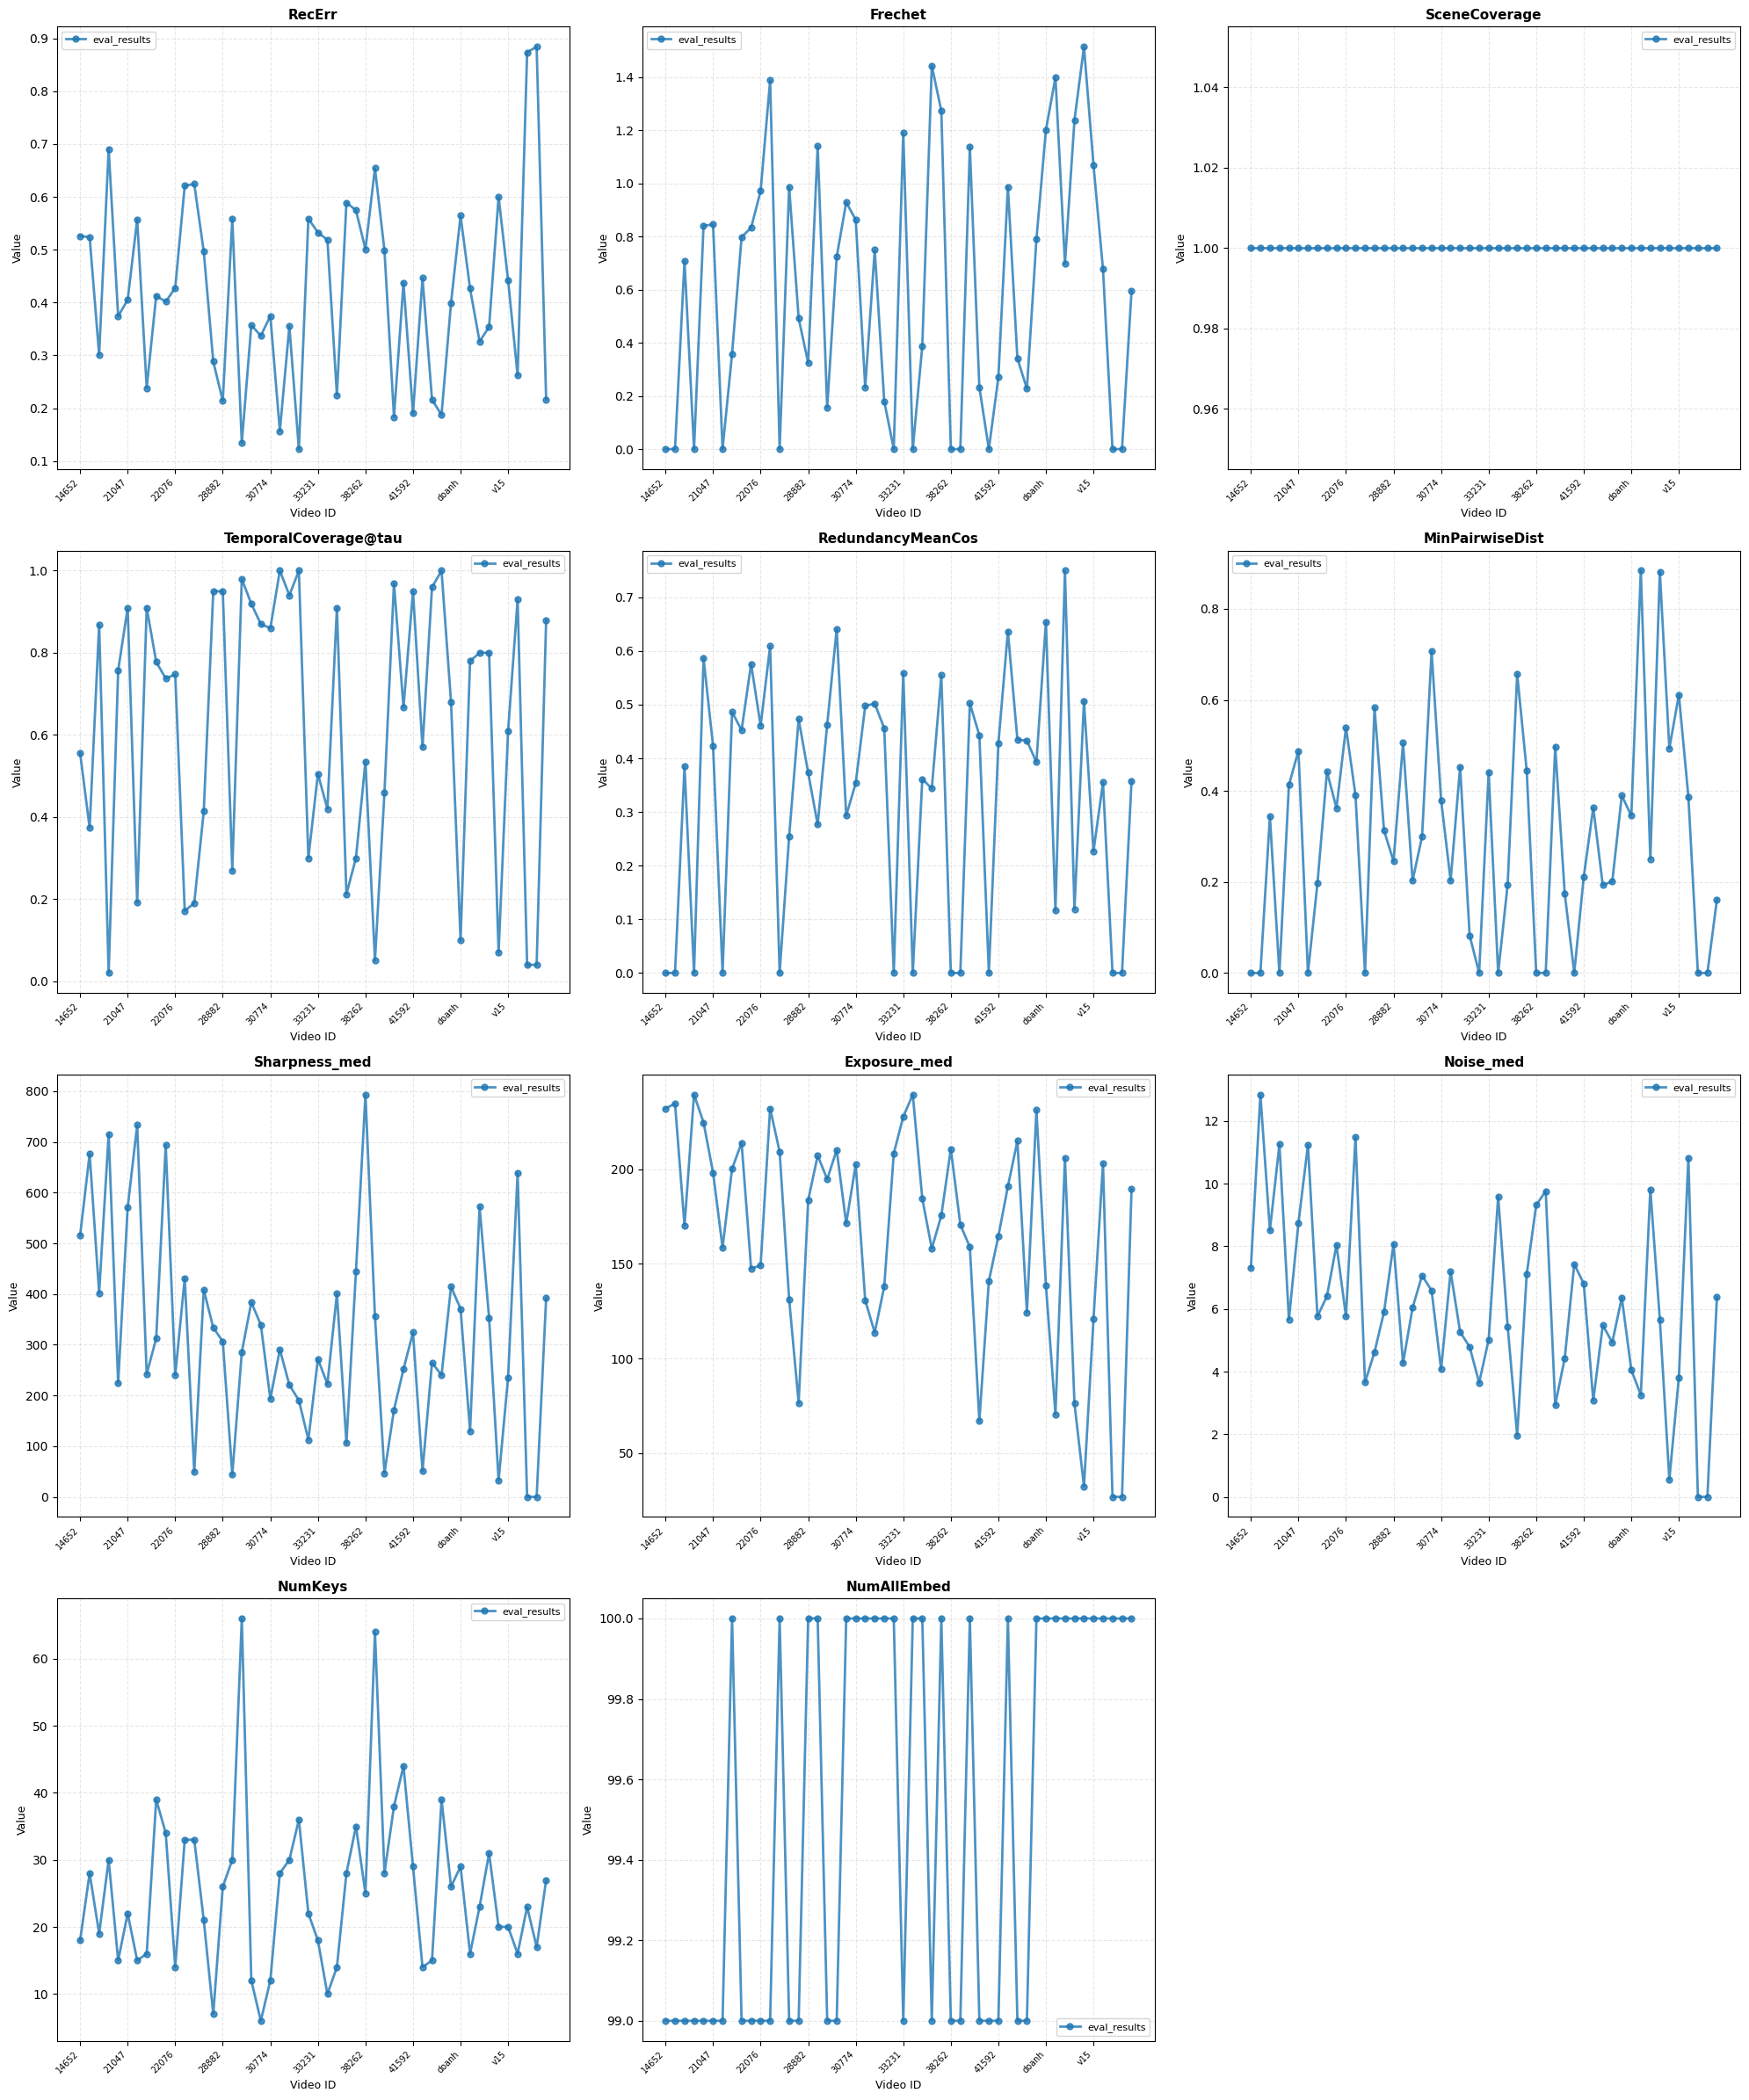

✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_RecErr.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_Frechet.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_SceneCoverage.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_TemporalCoverage@tau.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_RedundancyMeanCos.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_MinPairwiseDist.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_Sharpness_med.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_Exposure_med.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots/metric_Noise_med.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/DI

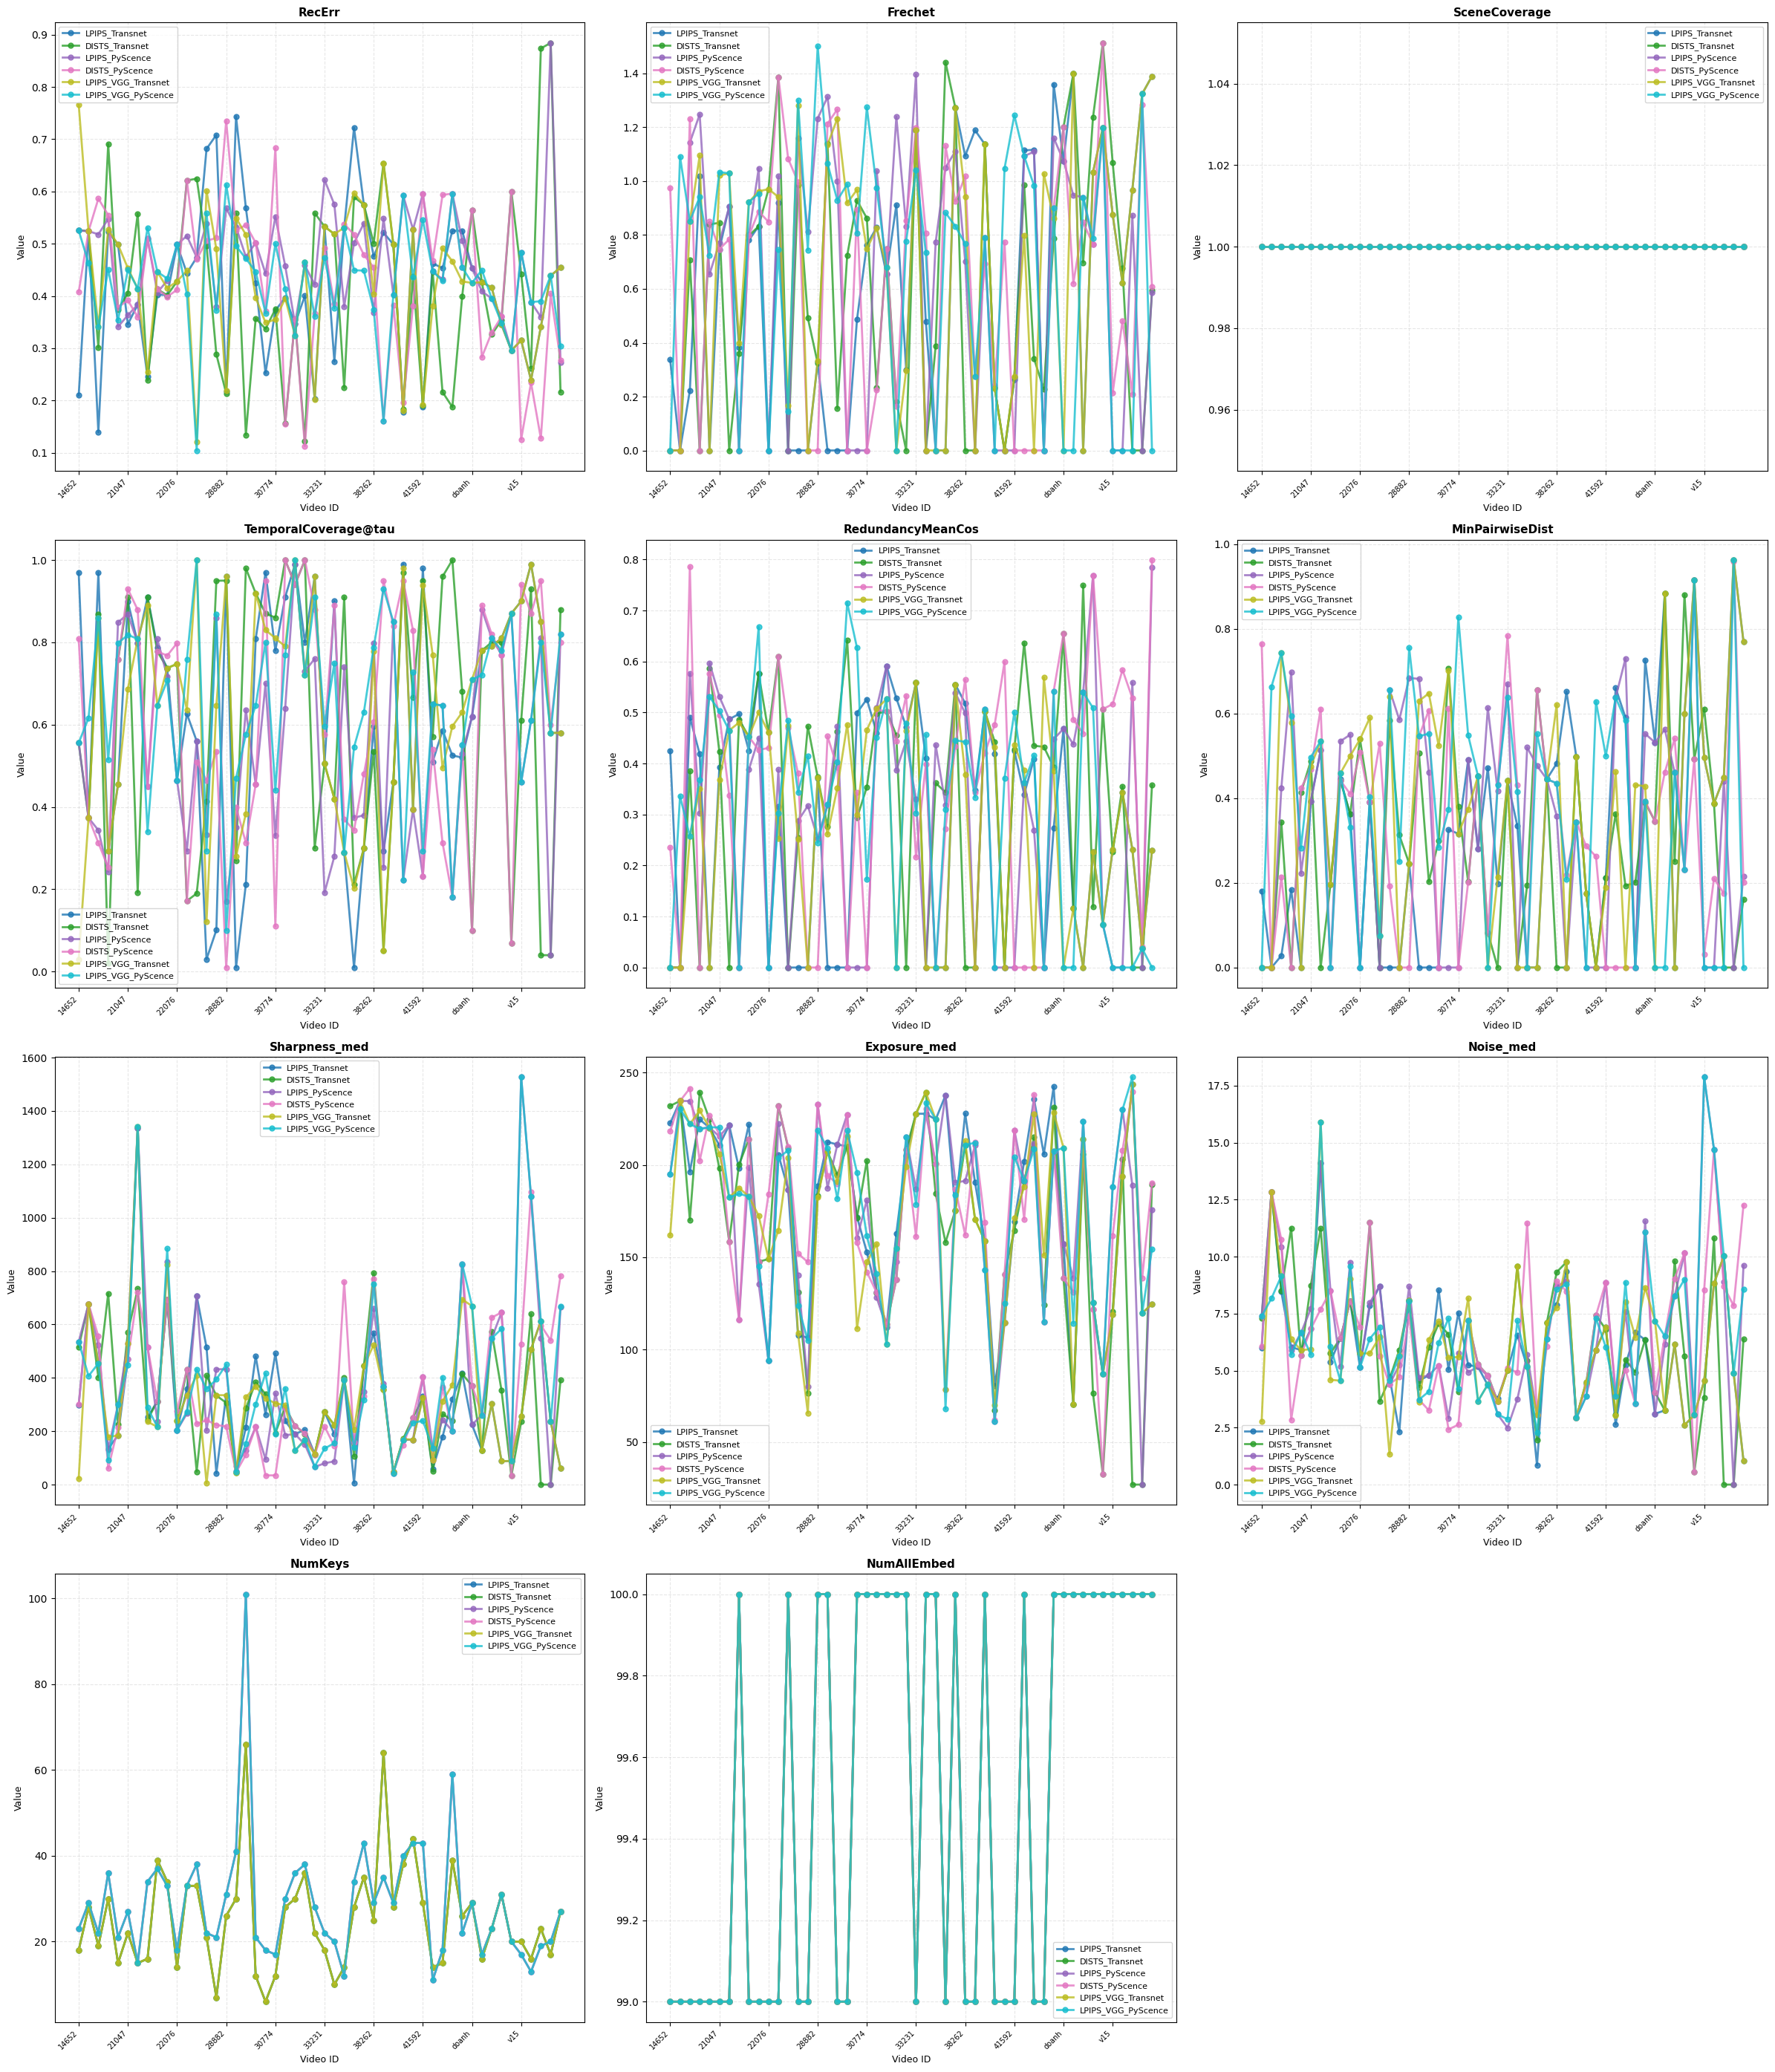

✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_RecErr.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_Frechet.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_SceneCoverage.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_TemporalCoverage@tau.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_RedundancyMeanCos.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_MinPairwiseDist.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_Sharpness_med.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_Exposure_med.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_Noise_med.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration/data/visualize/comparison_NumKeys.png
✅ Saved to: /home/serverai/ltdoanh/LayoutGeneration

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Plot batch evaluation results from eval_results.json files with line charts
Jupyter-friendly version - supports multiple eval directories for comparison
"""

import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

class BatchResultsPlotter:
    """Plot evaluation results from batch processing"""
    
    def __init__(self, eval_results_dir: str, label: str = None):
        """
        Args:
            eval_results_dir: Path to eval_results directory containing video folders
            label: Label for this dataset (for legend in multi-plot)
        """
        self.eval_results_dir = eval_results_dir
        self.label = label or os.path.basename(eval_results_dir)
        self.metrics_data = {}
        self.video_ids = []
    
    def load_results(self) -> bool:
        """Load all eval_results.json files from video directories"""
        
        # Find all eval_results.json files
        pattern = os.path.join(self.eval_results_dir, "*", "eval_results.json")
        json_files = glob.glob(pattern)
        
        if not json_files:
            print(f"❌ No eval_results.json found in {self.eval_results_dir}")
            return False
        
        print(f"✅ Found {len(json_files)} eval_results.json files in {self.label}")
        
        # Load and parse each file
        for json_file in sorted(json_files):
            video_id = os.path.basename(os.path.dirname(json_file))
            
            try:
                with open(json_file, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                
                # Extract "method" metrics (skip baselines)
                if "method" in data:
                    self.metrics_data[video_id] = data["method"]
                    self.video_ids.append(video_id)
                    
            except Exception as e:
                print(f"  ⚠️  Error reading {json_file}: {e}")
        
        # Sort video IDs alphabetically
        self.video_ids.sort()
        
        print(f"✅ Loaded metrics for {len(self.video_ids)} videos")
        return len(self.video_ids) > 0
    
    def get_metric_values(self, metric_name: str, max_videos: int = 50) -> Tuple[List[str], List[float]]:
        """
        Extract metric values for all videos
        Replace NaN with 0
        """
        video_ids = self.video_ids[:max_videos]
        values = []
        
        for vid in video_ids:
            if vid in self.metrics_data:
                val = self.metrics_data[vid].get(metric_name)
                
                # Handle NaN
                if val is None or (isinstance(val, float) and np.isnan(val)):
                    val = 0.0
                
                values.append(float(val))
            else:
                values.append(0.0)
        
        return video_ids, values
    
    def plot_single_metric(self, metric_name: str, max_videos: int = 50, 
                          figsize: Tuple[int, int] = (14, 6)):
        """Plot single metric as line chart"""
        
        video_ids, values = self.get_metric_values(metric_name, max_videos)
        
        fig, ax = plt.subplots(figsize=figsize)
        
        x_pos = np.arange(len(video_ids))
        
        # Plot line
        ax.plot(x_pos, values, marker='o', linewidth=2.5, markersize=6, 
                label=self.label, alpha=0.8)
        
        ax.set_xlabel('Video ID (Alphabetical Order)', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'{metric_name} Value', fontsize=12, fontweight='bold')
        ax.set_title(f'Batch Evaluation Results - {metric_name} ({len(video_ids)} videos)', 
                    fontsize=14, fontweight='bold')
        ax.grid(axis='both', alpha=0.3, linestyle='--')
        
        # Set x-axis ticks
        step = max(1, len(video_ids) // 15)
        ax.set_xticks(x_pos[::step])
        ax.set_xticklabels(video_ids[::step], rotation=45, ha='right', fontsize=9)
        
        plt.tight_layout()
        return fig, ax
    
    def plot_all_metrics(self, max_videos: int = 50, figsize: Tuple[int, int] = (20, 24)):
        """Plot all metrics in subplots with line charts"""
        
        # Define metrics to plot
        metrics = [
            'RecErr', 'Frechet', 'SceneCoverage', 'TemporalCoverage@tau',
            'RedundancyMeanCos', 'MinPairwiseDist', 'Sharpness_med',
            'Exposure_med', 'Noise_med', 'NumKeys', 'NumAllEmbed'
        ]
        
        # Create figure with subplots
        n_metrics = len(metrics)
        n_cols = 3
        n_rows = (n_metrics + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        axes = axes.flatten()
        
        for idx, metric in enumerate(metrics):
            ax = axes[idx]
            
            video_ids, values = self.get_metric_values(metric, max_videos)
            
            x_pos = np.arange(len(video_ids))
            
            # Plot line
            ax.plot(x_pos, values, marker='o', linewidth=2, markersize=5, 
                   label=self.label, alpha=0.8)
            
            ax.set_xlabel('Video ID', fontsize=9)
            ax.set_ylabel('Value', fontsize=9)
            ax.set_title(f'{metric}', fontsize=11, fontweight='bold')
            ax.grid(axis='both', alpha=0.3, linestyle='--')
            ax.legend(fontsize=8)
            
            # Set x-axis ticks
            step = max(1, len(video_ids) // 10)
            ax.set_xticks(x_pos[::step])
            ax.set_xticklabels(video_ids[::step], rotation=45, ha='right', fontsize=7)
        
        # Hide unused subplots
        for idx in range(len(metrics), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        return fig
    
    def save_summary_table(self, output_path: str, max_videos: int = 50):
        """Save metrics summary as CSV"""
        
        import csv
        
        video_ids = self.video_ids[:max_videos]
        
        metrics = [
            'RecErr', 'Frechet', 'SceneCoverage', 'TemporalCoverage@tau',
            'RedundancyMeanCos', 'MinPairwiseDist', 'Sharpness_med',
            'Exposure_med', 'Noise_med', 'NumKeys', 'NumAllEmbed'
        ]
        
        with open(output_path, 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            
            # Header
            writer.writerow(['Video_ID'] + metrics)
            
            # Data rows
            for vid in video_ids:
                row = [vid]
                for metric in metrics:
                    val = self.metrics_data[vid].get(metric)
                    if val is None or (isinstance(val, float) and np.isnan(val)):
                        row.append(0.0)
                    else:
                        row.append(float(val))
                writer.writerow(row)
        
        print(f"✅ Summary table saved to: {output_path}")


class MultiPlotter:
    """Plot and compare multiple eval directories"""
    
    def __init__(self, eval_dirs_dict: Dict[str, str]):
        """
        Args:
            eval_dirs_dict: Dict mapping label -> eval_results_dir path
                           e.g., {'LPIPS': '/path/to/lpips/eval_results', 
                                  'DISTS': '/path/to/dists/eval_results'}
        """
        self.plotters = {}
        self.common_video_ids = None
        
        for label, eval_dir in eval_dirs_dict.items():
            plotter = BatchResultsPlotter(eval_dir, label=label)
            if plotter.load_results():
                self.plotters[label] = plotter
                
                # Find common video IDs across all datasets
                if self.common_video_ids is None:
                    self.common_video_ids = set(plotter.video_ids)
                else:
                    self.common_video_ids &= set(plotter.video_ids)
        
        self.common_video_ids = sorted(list(self.common_video_ids)) if self.common_video_ids else []
        print(f"\n✅ Found {len(self.common_video_ids)} common videos across all datasets")
    
    def plot_single_metric_comparison(self, metric_name: str, max_videos: int = 50,
                                     figsize: Tuple[int, int] = (16, 7)):
        """Plot single metric for all datasets on same chart"""
        
        fig, ax = plt.subplots(figsize=figsize)
        
        colors = plt.cm.tab10(np.linspace(0, 1, len(self.plotters)))
        
        for (label, plotter), color in zip(self.plotters.items(), colors):
            # Use common videos only
            video_ids_subset = plotter.video_ids[:max_videos]
            common_subset = [v for v in video_ids_subset if v in self.common_video_ids]
            
            values = []
            for vid in common_subset:
                val = plotter.metrics_data[vid].get(metric_name)
                if val is None or (isinstance(val, float) and np.isnan(val)):
                    val = 0.0
                values.append(float(val))
            
            x_pos = np.arange(len(common_subset))
            ax.plot(x_pos, values, marker='o', linewidth=2.5, markersize=7,
                   label=label, color=color, alpha=0.8)
        
        ax.set_xlabel('Video ID (Alphabetical Order)', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'{metric_name} Value', fontsize=12, fontweight='bold')
        ax.set_title(f'Comparison - {metric_name} (Lower is Better)', 
                    fontsize=14, fontweight='bold')
        ax.grid(axis='both', alpha=0.3, linestyle='--')
        ax.legend(fontsize=11, loc='best')
        
        # Set x-axis ticks
        step = max(1, len(common_subset) // 15)
        x_pos = np.arange(len(common_subset))
        ax.set_xticks(x_pos[::step])
        ax.set_xticklabels(common_subset[::step], rotation=45, ha='right', fontsize=9)
        
        plt.tight_layout()
        return fig
    
    def plot_all_metrics_comparison(self, max_videos: int = 50, 
                                   figsize: Tuple[int, int] = (24, 28)):
        """Plot all metrics for all datasets on same subplots"""
        
        metrics = [
            'RecErr', 'Frechet', 'SceneCoverage', 'TemporalCoverage@tau',
            'RedundancyMeanCos', 'MinPairwiseDist', 'Sharpness_med',
            'Exposure_med', 'Noise_med', 'NumKeys', 'NumAllEmbed'
        ]
        
        n_metrics = len(metrics)
        n_cols = 3
        n_rows = (n_metrics + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        axes = axes.flatten()
        
        colors = plt.cm.tab10(np.linspace(0, 1, len(self.plotters)))
        
        for idx, metric in enumerate(metrics):
            ax = axes[idx]
            
            for (label, plotter), color in zip(self.plotters.items(), colors):
                # Use common videos only
                video_ids_subset = plotter.video_ids[:max_videos]
                common_subset = [v for v in video_ids_subset if v in self.common_video_ids]
                
                values = []
                for vid in common_subset:
                    val = plotter.metrics_data[vid].get(metric)
                    if val is None or (isinstance(val, float) and np.isnan(val)):
                        val = 0.0
                    values.append(float(val))
                
                x_pos = np.arange(len(common_subset))
                ax.plot(x_pos, values, marker='o', linewidth=2, markersize=5,
                       label=label, color=color, alpha=0.8)
            
            ax.set_xlabel('Video ID', fontsize=9)
            ax.set_ylabel('Value', fontsize=9)
            ax.set_title(f'{metric}', fontsize=11, fontweight='bold')
            ax.grid(axis='both', alpha=0.3, linestyle='--')
            ax.legend(fontsize=8, loc='best')
            
            # Set x-axis ticks
            step = max(1, len(common_subset) // 10)
            x_pos = np.arange(len(common_subset))
            ax.set_xticks(x_pos[::step])
            ax.set_xticklabels(common_subset[::step], rotation=45, ha='right', fontsize=7)
        
        # Hide unused subplots
        for idx in range(len(metrics), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        return fig


# ============================================================================
# JUPYTER CELL - SINGLE DATASET (Line Chart)
# ============================================================================

print("=" * 80)
print("OPTION 1: Plot Single Dataset (Line Chart)")
print("=" * 80)

# 🔧 CONFIGURATION - Edit these values
EVAL_DIR_SINGLE = "/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_dists/eval_results"
OUTPUT_DIR_SINGLE = "/home/serverai/ltdoanh/LayoutGeneration/data/visualize/DISTS_plots"
MAX_VIDEOS_SINGLE = 50
METRIC_SINGLE = None  # None = plot all, or "RecErr", "Frechet", etc.

# Create plotter
print("📊 Initializing plotter...")
plotter = BatchResultsPlotter(EVAL_DIR_SINGLE)

# Load results
if plotter.load_results():
    os.makedirs(OUTPUT_DIR_SINGLE, exist_ok=True)
    
    # ...existing code...
    if METRIC_SINGLE:
        # Plot single metric
        print(f"\n📊 Plotting single metric: {METRIC_SINGLE}")
        fig, ax = plotter.plot_single_metric(METRIC_SINGLE, max_videos=MAX_VIDEOS_SINGLE)
        output_path = os.path.join(OUTPUT_DIR_SINGLE, f"metric_{METRIC_SINGLE}.png")
        fig.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"✅ Saved to: {output_path}")
        plt.show()
    else:
        # Plot all metrics
        print(f"\n📊 Plotting all metrics")
        metrics = [
            'RecErr', 'Frechet', 'SceneCoverage', 'TemporalCoverage@tau',
            'RedundancyMeanCos', 'MinPairwiseDist', 'Sharpness_med',
            'Exposure_med', 'Noise_med', 'NumKeys', 'NumAllEmbed'
        ]
        fig = plotter.plot_all_metrics(max_videos=MAX_VIDEOS_SINGLE)
        output_path = os.path.join(OUTPUT_DIR_SINGLE, "all_metrics.png")
        fig.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"✅ Saved to: {output_path}")
        plt.show()
        # Save each metric as a separate image
        for metric in metrics:
            fig_metric, ax_metric = plotter.plot_single_metric(metric, max_videos=MAX_VIDEOS_SINGLE)
            metric_path = os.path.join(OUTPUT_DIR_SINGLE, f"metric_{metric}.png")
            fig_metric.savefig(metric_path, dpi=150, bbox_inches='tight')
            print(f"✅ Saved to: {metric_path}")
            plt.close(fig_metric)


    # Save summary table
    summary_path = os.path.join(OUTPUT_DIR_SINGLE, "metrics_summary.csv")
    plotter.save_summary_table(summary_path, max_videos=MAX_VIDEOS_SINGLE)
    print(f"\n✅ All done! Check {OUTPUT_DIR_SINGLE} for outputs")


# ============================================================================
# JUPYTER CELL - COMPARE MULTIPLE DATASETS
# ============================================================================

print("\n" + "=" * 80)
print("OPTION 2: Compare Multiple Datasets (Line Chart Overlay)")
print("=" * 80)

# 🔧 CONFIGURATION - Map dataset labels to eval_results directories
EVAL_DIRS_MULTI = {
    'LPIPS_Transnet': '/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips/eval_results',
    'DISTS_Transnet': '/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_dists/eval_results',
    'LPIPS_PyScence': '/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips_pyscence/eval_results',
    'DISTS_PyScence': '/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_dists_pyscence/eval_results',
    'LPIPS_VGG_Transnet': '/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips_vgg/eval_results',
    'LPIPS_VGG_PyScence': '/home/serverai/ltdoanh/LayoutGeneration/data/outputs/Dang/batch_eval_lpips_vgg_pyscence/eval_results'
    # Add more: 'OTHER': 'path/to/other/eval_results',
}

OUTPUT_DIR_MULTI = "/home/serverai/ltdoanh/LayoutGeneration/data/visualize"
MAX_VIDEOS_MULTI = 50
METRIC_MULTI = None  # None = plot all, or "RecErr", "Frechet", etc.

# Create multi-plotter
print("📊 Initializing multi-plotter...")
multi_plotter = MultiPlotter(EVAL_DIRS_MULTI)

if len(multi_plotter.plotters) > 1:
    os.makedirs(OUTPUT_DIR_MULTI, exist_ok=True)
    
    if METRIC_MULTI:
        print(f"\n📊 Plotting comparison: {METRIC_MULTI}")
        fig = multi_plotter.plot_single_metric_comparison(METRIC_MULTI, max_videos=MAX_VIDEOS_MULTI)
        output_path = os.path.join(OUTPUT_DIR_MULTI, f"comparison_{METRIC_MULTI}.png")
        fig.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"✅ Saved to: {output_path}")
        plt.show()
    else:
        print(f"\n📊 Plotting all metrics comparison")
        metrics = [
            'RecErr', 'Frechet', 'SceneCoverage', 'TemporalCoverage@tau',
            'RedundancyMeanCos', 'MinPairwiseDist', 'Sharpness_med',
            'Exposure_med', 'Noise_med', 'NumKeys', 'NumAllEmbed'
        ]
        fig = multi_plotter.plot_all_metrics_comparison(max_videos=MAX_VIDEOS_MULTI)
        output_path = os.path.join(OUTPUT_DIR_MULTI, "all_metrics_comparison.png")
        fig.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"✅ Saved to: {output_path}")
        plt.show()
        
        # Save each metric as a separate image
        for metric in metrics:
            fig_metric = multi_plotter.plot_single_metric_comparison(metric, max_videos=MAX_VIDEOS_MULTI)
            metric_path = os.path.join(OUTPUT_DIR_MULTI, f"comparison_{metric}.png")
            fig_metric.savefig(metric_path, dpi=150, bbox_inches='tight')
            print(f"✅ Saved to: {metric_path}")
            plt.close(fig_metric)
        
        # Save summary table for all datasets
        import pandas as pd
        summary_rows = []
        for vid in multi_plotter.common_video_ids:
            row = {'Video_ID': vid}
            for label, plotter in multi_plotter.plotters.items():
                for metric in metrics:
                    val = plotter.metrics_data[vid].get(metric)
                    if val is None:
                        val = 0.0
                    row[f"{label}_{metric}"] = float(val)
            summary_rows.append(row)
        df_summary = pd.DataFrame(summary_rows)
        summary_path = os.path.join(OUTPUT_DIR_MULTI, "metrics_summary_comparison.csv")
        df_summary.to_csv(summary_path, index=False)
        print(f"✅ Summary table saved to: {summary_path}")
else:
    print("❌ Need at least 2 datasets for comparison")

In [3]:
import pandas as pd

df = pd.read_csv("/home/serverai/ltdoanh/LayoutGeneration/data/visualize/metrics_summary_comparison.csv")

# Tách các nhóm phương pháp
methods = ["LPIPS_Transnet", "DISTS_Transnet", "LPIPS_PyScence", "DISTS_PyScence", "LPIPS_VGG_Transnet", "LPIPS_VGG_PyScence"]
metrics = [
    "RecErr", "Frechet", "SceneCoverage", "TemporalCoverage@tau",
    "RedundancyMeanCos", "MinPairwiseDist", "Sharpness_med",
    "Exposure_med", "Noise_med", "NumKeys", "NumAllEmbed"
]

# Tính trung bình từng metric cho mỗi phương pháp
summary = {}
for method in methods:
    summary[method] = {}
    for metric in metrics:
        col = f"{method}_{metric}"
        if col in df.columns:
            summary[method][metric] = df[col].mean(skipna=True)

# In bảng tổng hợp
summary_df = pd.DataFrame(summary)
print("=== Bảng tổng hợp giá trị trung bình từng metric ===")
print(summary_df)
print()

# Đánh giá tổng quan:
# - RecErr, Frechet, Noise_med, RedundancyMeanCos, MinPairwiseDist: càng thấp càng tốt
# - SceneCoverage, TemporalCoverage@tau, Sharpness_med, Exposure_med, NumKeys, NumAllEmbed: càng cao càng tốt

low_is_better = ["RecErr", "Frechet", "Noise_med", "RedundancyMeanCos", "MinPairwiseDist"]
high_is_better = ["SceneCoverage", "TemporalCoverage@tau", "Sharpness_med", "Exposure_med", "NumKeys", "NumAllEmbed"]

# Đếm số lượng metrics mỗi phương pháp tốt nhất và in chi tiết từng metric
best_count = {m: 0 for m in methods}
print("=== Phương pháp tốt nhất cho từng metric ===")
for metric in metrics:
    vals = {m: summary[m][metric] for m in methods if metric in summary[m]}
    if metric in low_is_better:
        best = min(vals, key=vals.get)
    else:
        best = max(vals, key=vals.get)
    best_count[best] += 1
    print(f"- {metric}: {best} (giá trị: {vals[best]:.4f})")

print("\nSố lượng metrics tốt nhất mỗi phương pháp:", best_count)

# Kết luận phương pháp tốt nhất
best_method = max(best_count, key=best_count.get)
print(f"\n=> Phương pháp tốt nhất tổng thể là: {best_method} (số lượng metrics tốt nhất: {best_count[best_method]})")

=== Bảng tổng hợp giá trị trung bình từng metric ===
                      LPIPS_Transnet  DISTS_Transnet  LPIPS_PyScence  \
RecErr                      0.420654        0.420084        0.468452   
Frechet                     0.854183        0.788853        0.973676   
SceneCoverage               1.000000        1.000000        1.000000   
TemporalCoverage@tau        0.645962        0.624553        0.562135   
RedundancyMeanCos           0.394634        0.444971        0.443009   
MinPairwiseDist             0.450940        0.392788        0.496240   
Sharpness_med             360.863256      374.696080      432.978364   
Exposure_med              178.276205      166.090736      174.634242   
Noise_med                   6.263451        6.573349        7.148658   
NumKeys                    24.941176       24.941176       28.627451   
NumAllEmbed                99.529412       99.529412       99.529412   

                      DISTS_PyScence  LPIPS_VGG_Transnet  LPIPS_VGG_PyScence  
Rec